## Predict if an existing customer is more likely to buy a new car using Random Forest Classifier

### Step 1: Import Neccessary Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### Step 2: Load the data

In [3]:
data = pd.read_csv(r'C:\Users\balas\OneDrive\Documents\ML_AT2\repurchase_dataset.csv')

In [4]:
# Descriptive Statistics
display(data.describe())

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


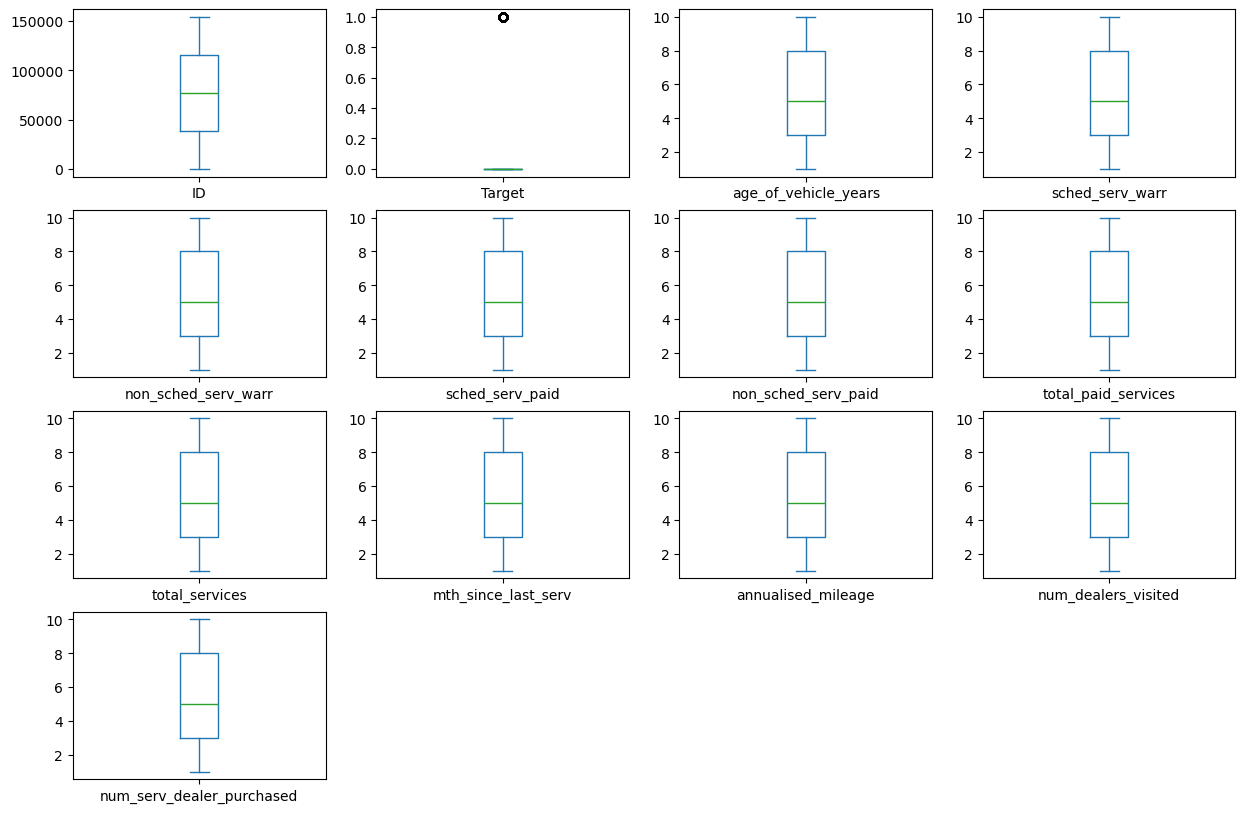

In [5]:
# Box plots for numerical features to check for outliers
num_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
data[num_features].plot(kind='box', figsize=(15, 10), subplots=True, layout=(4, 4))
plt.show()

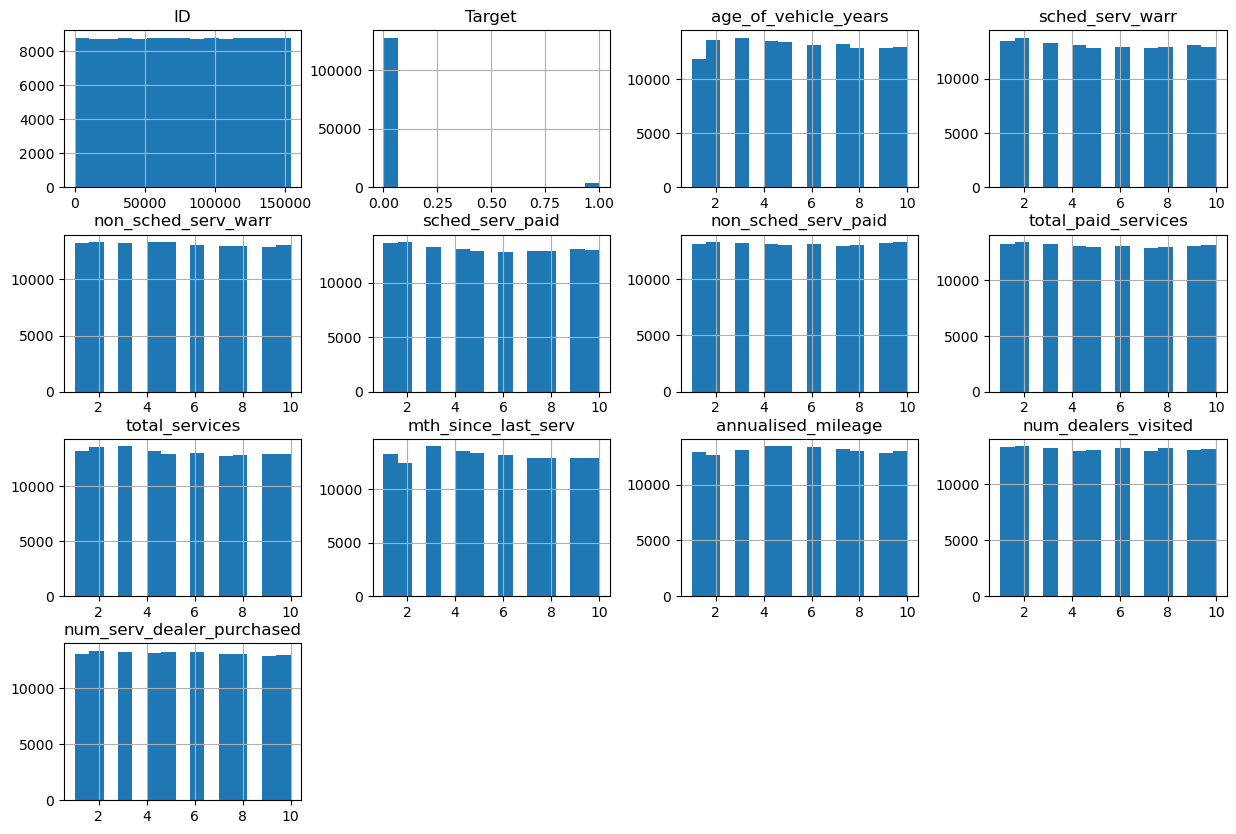

In [6]:
# Histograms for each numerical feature
data.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.show()

In [8]:
# Drop the 'ID' column
data.drop('ID', axis=1, inplace=True)
data.drop('age_band', axis=1, inplace=True)

# Encode the 'gender' column
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'].astype(str))

# One-hot encode the 'car_model' and 'car_segment' columns
data = pd.get_dummies(data, columns=['car_model', 'car_segment'])

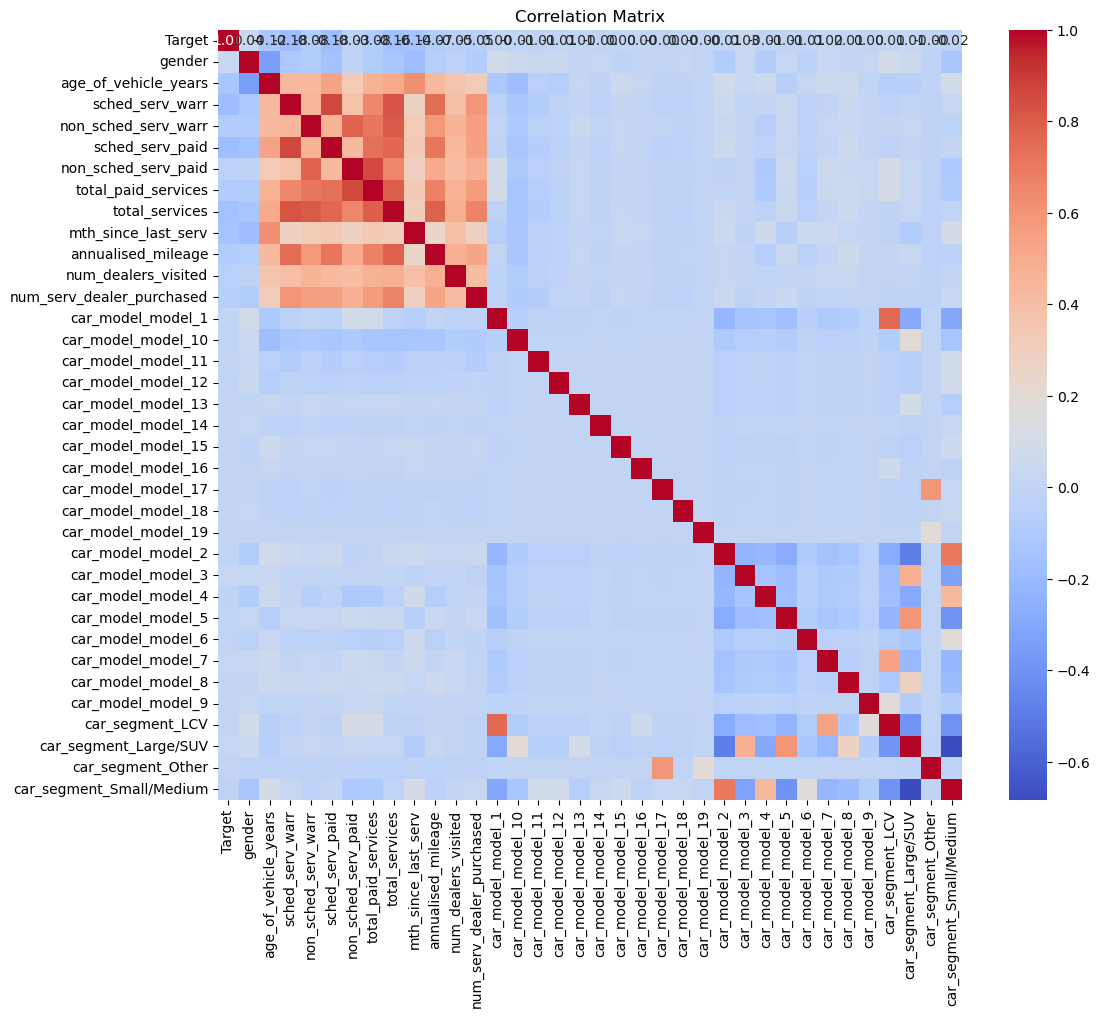

In [9]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Step 3: Process the data

In [4]:
data

,Target,gender,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,...,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
0,0,1,9,2,10,3,7,5,6,9,...,False,False,False,False,False,False,True,False,False,False
1,0,2,6,10,3,10,4,9,10,6,...,False,False,False,False,False,False,False,False,False,True
2,0,1,9,10,9,10,9,10,10,7,...,False,False,False,False,False,False,False,True,False,False
3,0,2,5,8,5,8,4,5,6,4,...,False,False,False,False,False,False,False,True,False,False
4,0,0,8,9,4,10,7,9,8,5,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,1,2,7,10,10,9,10,10,10,3,...,False,False,False,False,False,False,False,True,False,False
131333,1,2,4,10,10,10,10,10,10,2,...,False,False,False,False,False,False,False,True,False,False
131334,1,2,4,4,9,5,4,3,8,4,...,False,True,False,False,False,False,False,True,False,False
131335,1,2,2,1,10,1,10,9,8,3,...,False,True,False,False,False,False,False,True,False,False


### Step 4: Split the data into train and test sets

In [5]:
X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train

,gender,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,...,car_model_model_4,car_model_model_5,car_model_model_6,car_model_model_7,car_model_model_8,car_model_model_9,car_segment_LCV,car_segment_Large/SUV,car_segment_Other,car_segment_Small/Medium
76012,2,5,8,3,6,5,5,6,7,3,...,False,False,False,False,False,False,False,True,False,False
48072,2,5,9,5,6,3,4,7,7,3,...,False,False,False,False,False,False,False,True,False,False
17713,2,4,6,10,3,10,9,10,6,7,...,False,False,False,False,False,False,True,False,False,False
116540,2,6,7,3,5,2,3,4,7,8,...,False,False,False,False,False,False,True,False,False,False
71027,2,2,2,4,2,4,2,3,3,5,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,2,4,6,3,6,1,3,4,4,3,...,False,False,False,False,True,False,False,True,False,False
110268,1,6,10,8,10,10,10,9,3,10,...,False,False,False,False,False,False,False,False,False,True
119879,2,10,8,4,10,4,9,6,10,6,...,False,False,False,False,False,False,False,False,False,True
103694,2,6,8,8,10,8,9,7,3,7,...,False,True,False,False,False,False,False,True,False,False


In [7]:
y_train

76012     0
48072     0
17713     0
116540    0
71027     0
         ..
54886     0
110268    0
119879    0
103694    0
121958    0
Name: Target, Length: 105069, dtype: int64

### Step 5: Train the model

In [8]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

C:\Users\balas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\balas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\balas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\balas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

RandomForestClassifier(random_state=42)

### Step 6: Evaluate the model

In [23]:
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('ROC AUC score:', roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

Accuracy: 0.9953048068625958
Precision: 0.9795686719636776
Recall: 0.8378640776699029
F1-score: 0.9031920460491889
ROC AUC score: 0.9963951895546812


### Step 7: tuning the Hyperparameter grid to search

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Random Forest classifier object
rfc = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object to search for the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Predict the labels of the test set using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the performance of the model using various metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Best hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.9920816202223237
Precision: 0.9544303797468354
Recall: 0.7320388349514563
F1-Score: 0.8285714285714284


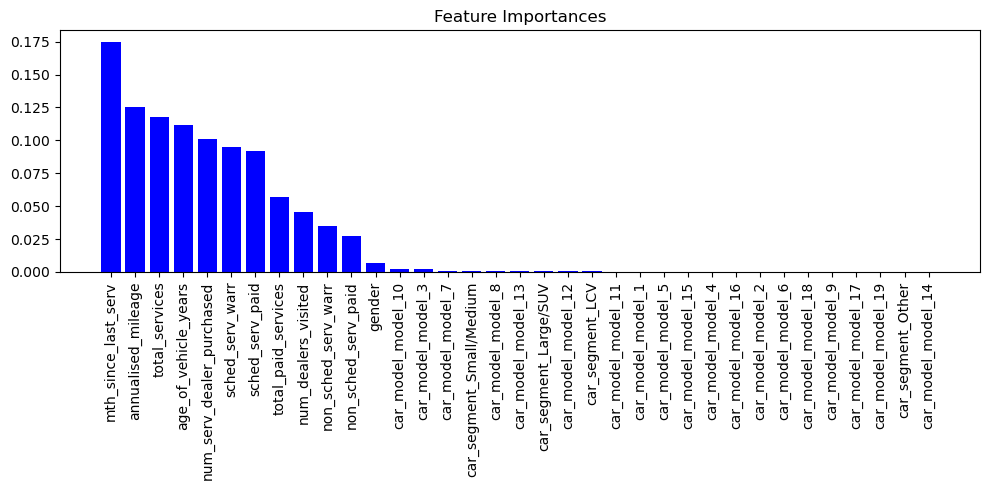

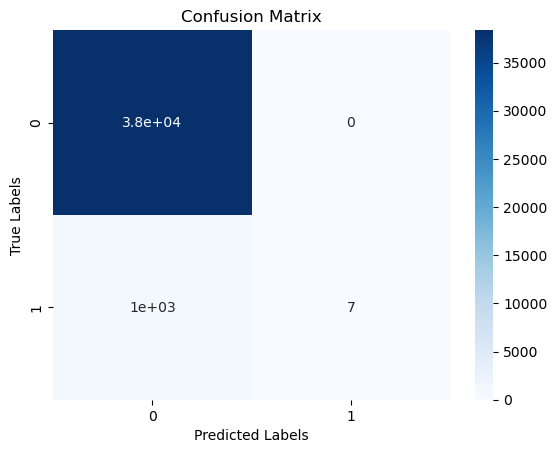

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)

# Get feature importances
importances = rfc.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices], color='b', align='center')
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# Get predictions on the test set
y_pred = rfc.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Calculate classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[38336    36]
 [  276   754]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     38372
           1       0.95      0.73      0.83      1030

    accuracy                           0.99     39402
   macro avg       0.97      0.87      0.91     39402
weighted avg       0.99      0.99      0.99     39402



C:\Users\balas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\balas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\balas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\balas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_d

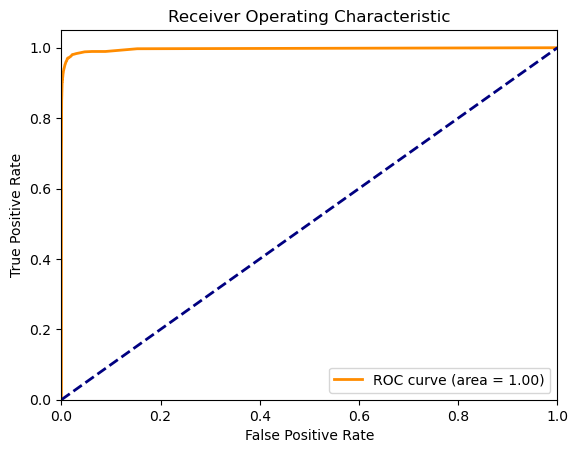

In [24]:

from sklearn.metrics import roc_curve, auc

y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


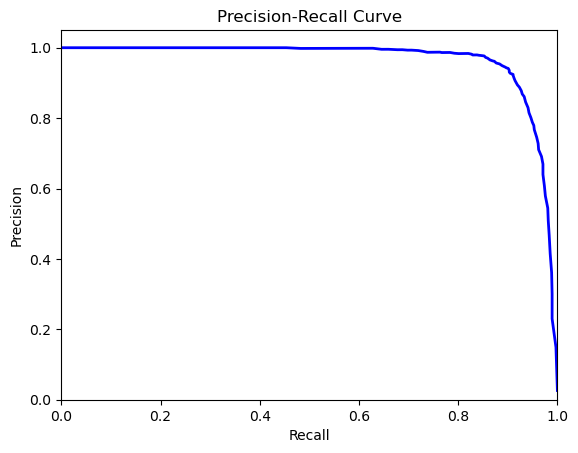

In [25]:

from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


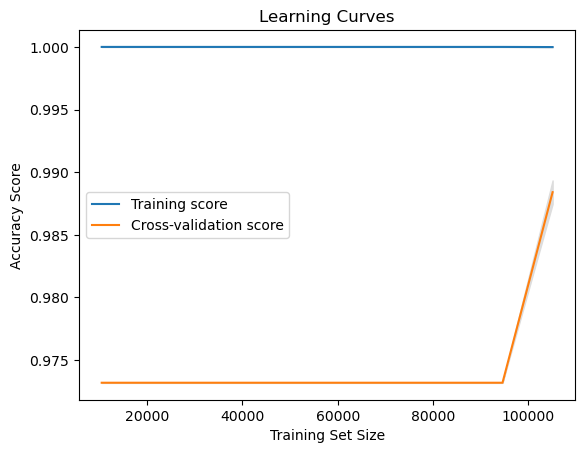

In [22]:

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(), X, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()
